# Photon-number Parity oscillations in the resonant Jaynes-Cummings model

Paper: https://doi.org/10.1016/j.optcom.2015.05.069.

In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt

from torchqc.states import QuantumState
from torchqc.common_functions import get_density_matrix, expect_val_dm
from torchqc.operators import Operator, DynamicOperator
from torchqc.common_matrices import sigmaZ, annihilation, creation, eye, sigmaPlus, sigmaMinus
from torchqc.dynamics import lindblad_equation
from torchqc.tensor_product import tensor_product_ops, tensor_product_states, partial_trace
import torch

In [2]:
n = 2 # two level atom
N = 100 # number of fock states
total_dims = n * N
basis_states = QuantumState.basis(n)
atom_state = basis_states[1]

b = np.sqrt(40)
coherent_state = QuantumState.coherent(N, b)

initial_state = tensor_product_states(coherent_state, atom_state)

* Simulate dynamics

In [3]:
T = 50
Dt = 0.01
wc = 0.1  # cavity frequency
wa = 0.1  # atom frequency
g = 1  # coupling strength
time = np.arange(0, T, Dt, dtype = np.float32)

* Jaynes-Cummings Hamiltonian under RWA

In [4]:
a_dagger = creation(N)
a = annihilation(N)
sigmap = sigmaPlus()
sigmam = sigmaMinus()

H1 = tensor_product_ops(eye(N), -(wa / 2) * sigmaZ())
H2 = tensor_product_ops(wc * a_dagger * a, eye(n))
H3 = g * (tensor_product_ops(a, sigmap) + tensor_product_ops(a_dagger, sigmam))

H = H1 + H2 + H3

In [5]:
hamiltonian = DynamicOperator(total_dims, H, time=time)

* Simulate dynamics with von-Neumann equations

In [6]:
rho = get_density_matrix(initial_state)
time_tensor, states = lindblad_equation(rho, hamiltonian, time, Dt)

* Compute population inversion w(t) and number operator expection values

In [7]:
N_op = a_dagger * a
expectation_values = expect_val_dm(states, tensor_product_ops(eye(N), sigmaZ()))
expectation_values2 = expect_val_dm(states, tensor_product_ops(N_op, eye(n)))

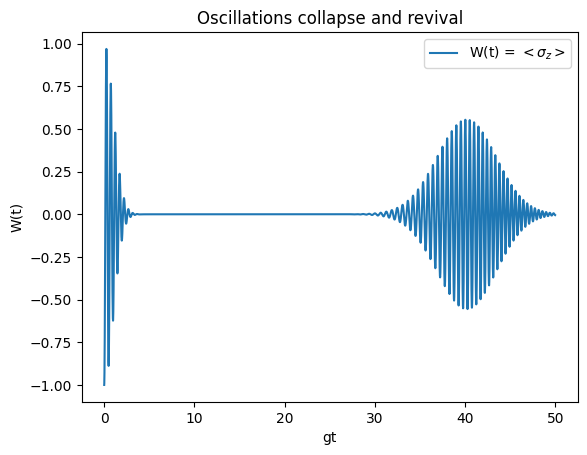

In [8]:
fig, ax = plt.subplots()

plt.plot(time, expectation_values, label=r"W(t) = $<\sigma_z>$")
plt.xlabel("gt")
plt.ylabel("W(t)")
plt.title("Oscillations collapse and revival")
ax.legend()

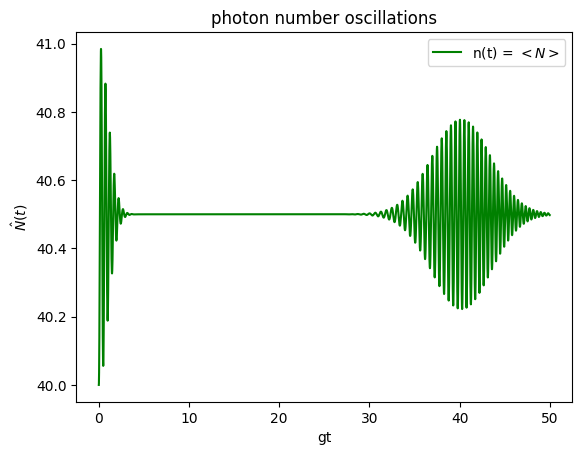

In [9]:
fig, ax = plt.subplots()

plt.plot(time, expectation_values2, c="g", label=r"n(t) = $<N>$")
plt.xlabel("gt")
plt.ylabel(r"$\hat{N}(t)$")
plt.title("photon number oscillations")
ax.legend()

* Photon number Parity operator

$\Pi_F = e^{i \pi \hat{N}} $

In [10]:
N_total = tensor_product_ops(a_dagger * a, eye(n)).matrix
                   
parity_operator = Operator(total_dims, torch.linalg.matrix_exp(1j * np.pi * N_total))

parity_exp_values = torch.real(expect_val_dm(states, parity_operator))

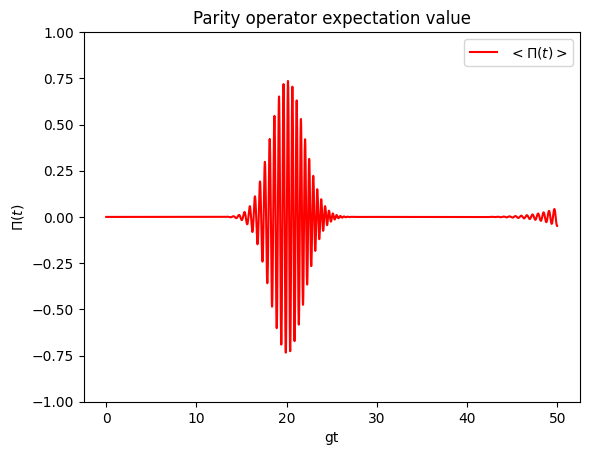

In [11]:
fig, ax = plt.subplots()

plt.plot(time, parity_exp_values, c="r", label=r"$<\Pi(t)>$")
plt.xlabel("gt")
plt.ylabel(r"$\Pi(t)$")
plt.title("Parity operator expectation value")
plt.ylim(-1., 1.)
ax.legend()

* Photon statistics

In [12]:
field_states = [partial_trace(state, [1]) for state in states]

* t = 0

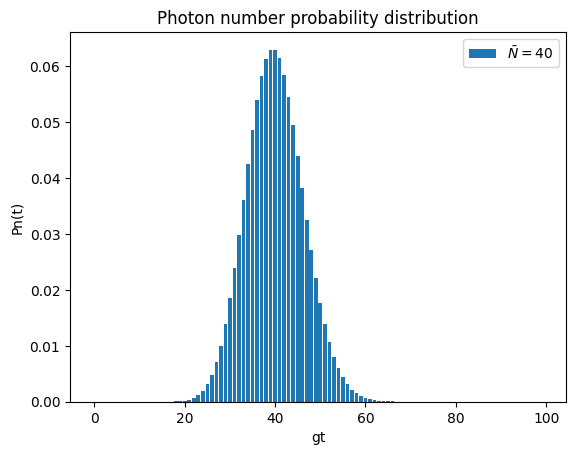

In [13]:
photon_number_distribution = torch.real(torch.diag(field_states[0].matrix))
photon_number = list(range(0, N))

fig, ax = plt.subplots()
plt.bar(photon_number, photon_number_distribution, label=r"$\bar{N} = 40$")
plt.xlabel("gt")
plt.ylabel("Pn(t)")
plt.title("Photon number probability distribution")
ax.legend()

* t = 10

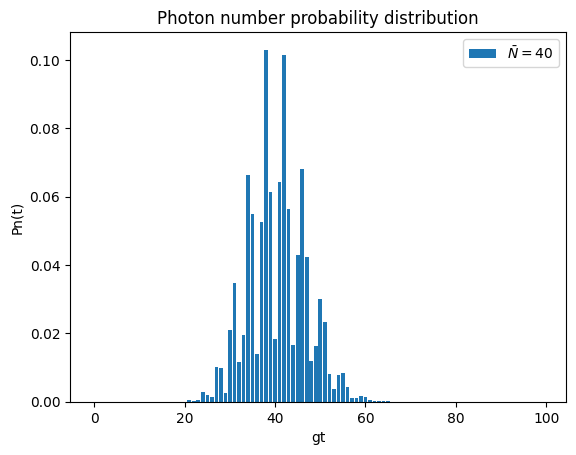

In [14]:
photon_number_distribution = torch.real(torch.diag(field_states[int(10 / Dt)].matrix))
photon_number = list(range(0, N))

fig, ax = plt.subplots()
plt.bar(photon_number, photon_number_distribution, label=r"$\bar{N} = 40$")
plt.xlabel("gt")
plt.ylabel("Pn(t)")
plt.title("Photon number probability distribution")
ax.legend()

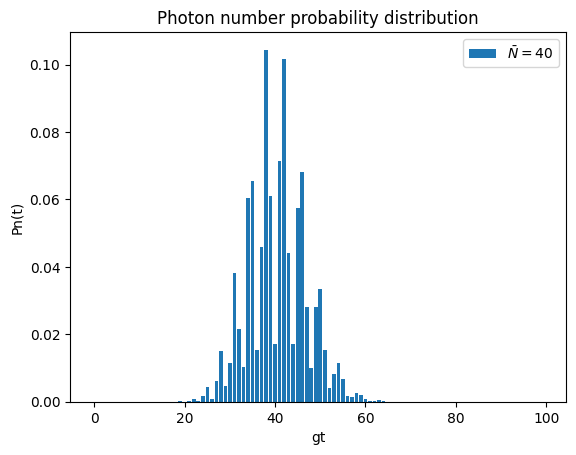

In [15]:
photon_number_distribution = torch.real(torch.diag(field_states[int(10.5 / Dt)].matrix))
photon_number = list(range(0, N))

fig, ax = plt.subplots()
plt.bar(photon_number, photon_number_distribution, label=r"$\bar{N} = 40$")
plt.xlabel("gt")
plt.ylabel("Pn(t)")
plt.title("Photon number probability distribution")
ax.legend()